In [9]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display #allows the use of display() for displaying dataframes

import matplotlib.pyplot as plt
import seaborn as sns

import visuals as vs

%matplotlib inline 

In [7]:
# numpy : higher-order mathematical functions
# pandas : data analysis and statistics
# matplotlib : data visualization, charts and graphs
# seaborn : data visualization

In [11]:
data = pd.read_csv("data/winequality-red.csv", sep=";") # load the dataset
display(data.head(n=5)) # first five records

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
null_counts = data.isnull().sum()
print("null counted: ", null_counts)

null counted:  fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [15]:
has_nulls = data.isnull().any()
print("any null: ", has_nulls)

any null:  fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool


In [17]:
data.info() # general information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [21]:
#total number of wines
n_wine = data.shape[0]
print("Total number of wine:", n_wine)

Total number of wine: 1599


In [23]:
#number of wines with quality rating above 6
quality_above_6 = data.loc[(data["quality"]>6)]
n_above_6 = quality_above_6.shape[0]
print("Number of wine with quality rating 7 and above: ",n_above_6)

Number of wine with quality rating 7 and above:  217


In [27]:
#number of wines with quality rating below 5
quality_below_5 = data.loc[(data["quality"]<6)]
n_below_5 = quality_below_5.shape[0]
print("Number of wine with quality rating 5 and below: ", n_below_5)

Number of wine with quality rating 5 and below:  744


In [29]:
#avg value
mean_quality = data["quality"].mean()
print("average of wine quality: ", mean_quality)

average of wine quality:  5.6360225140712945


In [33]:
std_value = data["quality"].std()
print(std_value)

0.8075694397347023


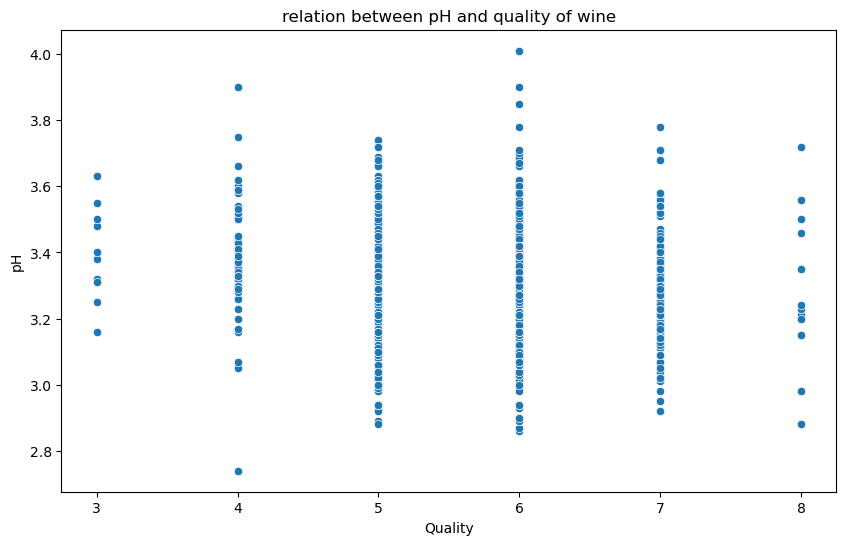

In [35]:
# drawing scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x="quality",y="pH",data=data)
plt.title("relation between pH and quality of wine")
plt.xlabel("Quality")
plt.ylabel("pH")
plt.show()

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

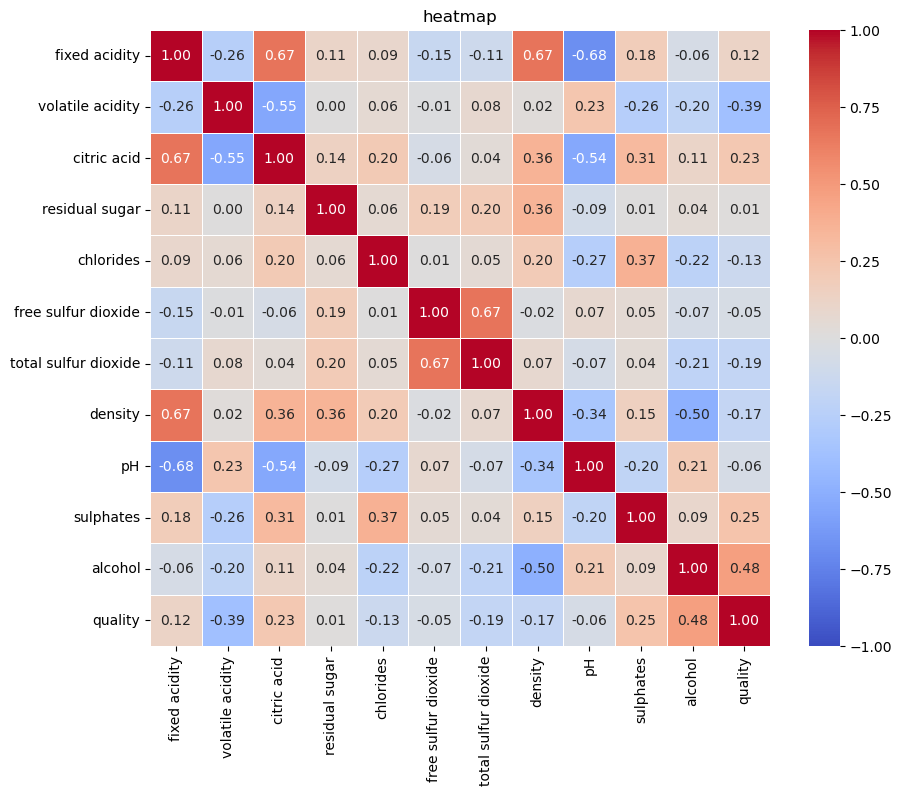

In [39]:
corr_matrix = data.corr()
print(corr_matrix)

# annot=True : cells with values
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("heatmap")
plt.show()

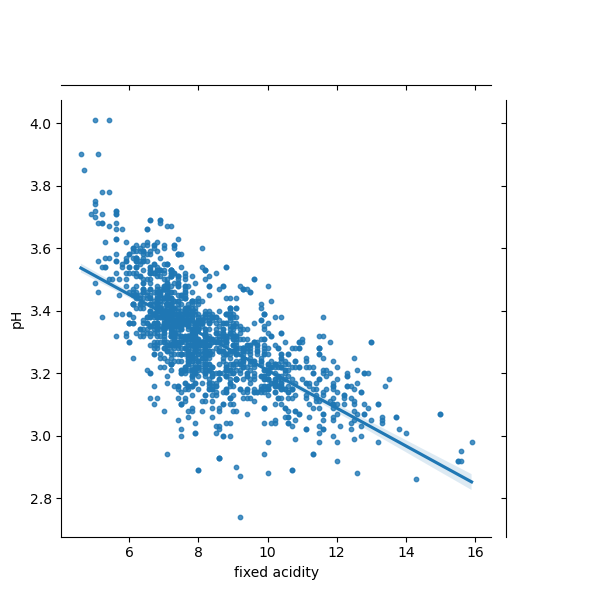

In [53]:
#new dataframe containing ph and fixed acidity
fixedAcidity_pH = data[["pH", "fixed acidity"]]

#joint-grid with the dataframe
gridA = sns.JointGrid(x="fixed acidity", y="pH", data=fixedAcidity_pH)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

fixed acidity özelliği için IQR ile aykırı değerlerin indeksleri: (array([ 205,  206,  243,  244,  264,  294,  328,  338,  339,  347,  353,
        359,  363,  364,  366,  374,  381,  391,  394,  409,  429,  440,
        442,  446,  470,  472,  509,  510,  516,  538,  544,  548,  554,
        555,  557,  559,  560,  564,  565,  596,  599,  601,  603,  611,
        652,  680,  811,  814, 1224], dtype=int64),)


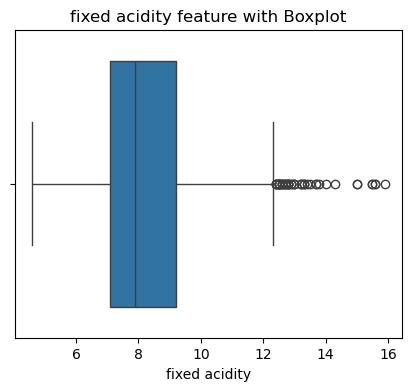

volatile acidity özelliği için IQR ile aykırı değerlerin indeksleri: (array([  38,   94,  120,  126,  127,  134,  199,  553,  672,  690,  700,
        705,  710,  724,  899, 1261, 1299, 1312, 1467], dtype=int64),)


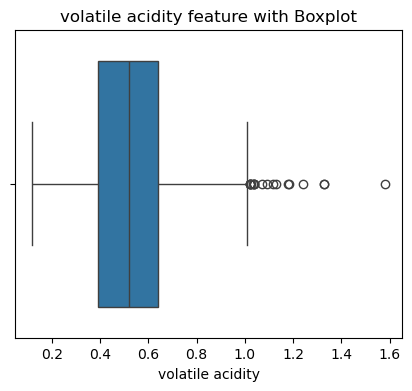

citric acid özelliği için IQR ile aykırı değerlerin indeksleri: (array([151], dtype=int64),)


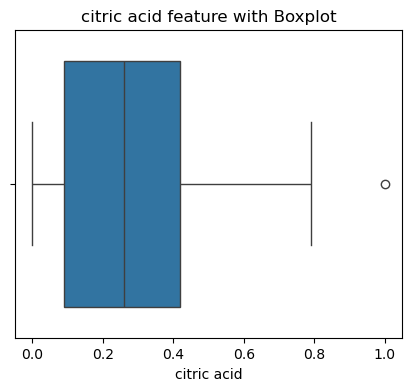

residual sugar özelliği için IQR ile aykırı değerlerin indeksleri: (array([   9,   11,   14,   15,   18,   33,   35,   39,   40,   55,   57,
         64,   65,  154,  155,  156,  157,  163,  164,  192,  215,  269,
        270,  271,  272,  274,  275,  277,  278,  279,  283,  324,  325,
        327,  353,  364,  366,  374,  375,  378,  395,  396,  400,  408,
        409,  413,  415,  442,  455,  480,  484,  494,  501,  502,  510,
        515,  516,  538,  539,  541,  554,  555,  556,  557,  558,  559,
        564,  595,  606,  608,  624,  625,  645,  649,  652,  659,  690,
        705,  719,  740,  800,  878,  884,  889,  903,  904,  910,  911,
        913,  917,  923,  941,  944,  946,  974, 1032, 1038, 1043, 1056,
       1057, 1059, 1071, 1074, 1077, 1078, 1079, 1081, 1086, 1094, 1096,
       1114, 1133, 1138, 1147, 1176, 1186, 1190, 1203, 1226, 1235, 1239,
       1244, 1257, 1276, 1288, 1289, 1295, 1296, 1307, 1331, 1358, 1373,
       1388, 1394, 1406, 1412, 1423, 1434, 1435, 1437, 1

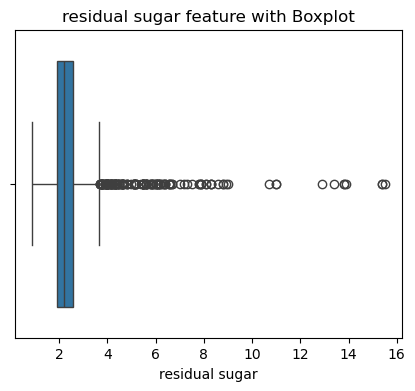

chlorides özelliği için IQR ile aykırı değerlerin indeksleri: (array([  14,   15,   17,   19,   38,   42,   81,   83,  106,  109,  120,
        125,  147,  151,  169,  181,  210,  226,  240,  258,  281,  291,
        303,  307,  308,  326,  330,  331,  335,  353,  368,  375,  396,
        400,  408,  418,  447,  451,  482,  483,  512,  515,  517,  549,
        566,  567,  568,  614,  618,  624,  625,  638,  666,  688,  689,
        692,  695,  730,  754,  773,  774,  776,  777,  780,  795,  796,
        797,  808,  832,  833,  836,  837,  861,  882,  910,  916,  958,
       1014, 1020, 1021, 1051, 1098, 1109, 1146, 1165, 1191, 1193, 1207,
       1220, 1221, 1252, 1258, 1259, 1260, 1299, 1319, 1334, 1358, 1370,
       1371, 1372, 1374, 1423, 1434, 1435, 1436, 1474, 1476, 1490, 1558,
       1570, 1571], dtype=int64),)


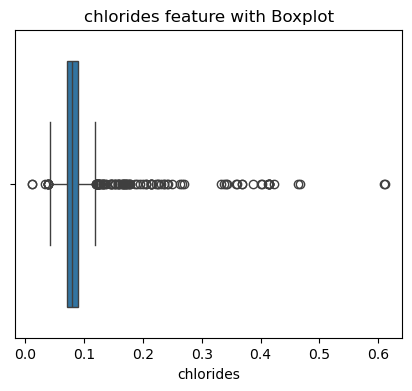

free sulfur dioxide özelliği için IQR ile aykırı değerlerin indeksleri: (array([  14,   15,   57,  396,  400,  497,  522,  584,  634,  678,  925,
        926,  982, 1075, 1131, 1154, 1156, 1175, 1217, 1231, 1244, 1256,
       1295, 1296, 1358, 1434, 1435, 1474, 1476, 1558], dtype=int64),)


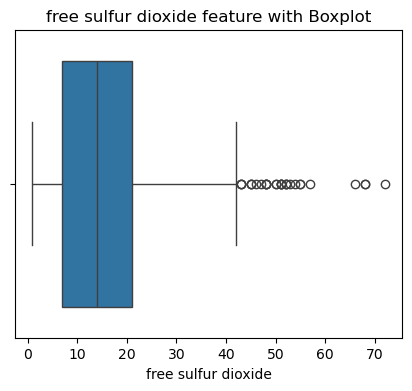

total sulfur dioxide özelliği için IQR ile aykırı değerlerin indeksleri: (array([  14,   15,   86,   88,   90,   91,   92,  109,  130,  145,  154,
        155,  156,  157,  188,  189,  190,  192,  201,  219,  313,  354,
        396,  400,  415,  417,  463,  515,  522,  523,  591,  636,  637,
        649,  651,  672,  684,  694,  723,  741,  771,  772,  791, 1079,
       1081, 1131, 1244, 1400, 1401, 1419, 1493, 1496, 1559, 1560, 1561],
      dtype=int64),)


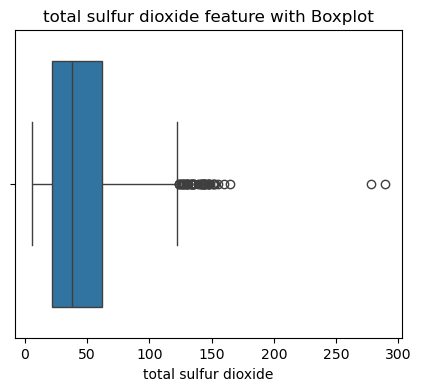

density özelliği için IQR ile aykırı değerlerin indeksleri: (array([ 142,  144,  294,  324,  325,  353,  354,  364,  366,  374,  381,
        391,  415,  442,  480,  538,  554,  555,  557,  559,  564,  588,
        591,  608,  695,  821,  836,  837,  889,  999, 1017, 1018, 1114,
       1122, 1126, 1228, 1269, 1270, 1298, 1434, 1435, 1474, 1475, 1476,
       1477], dtype=int64),)


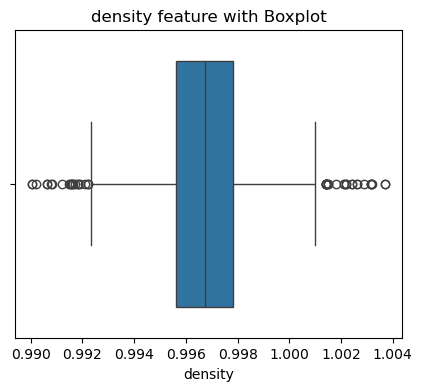

pH özelliği için IQR ile aykırı değerlerin indeksleri: (array([  45,   94,   95,  151,  268,  276,  440,  544,  553,  554,  555,
        557,  588,  614,  650,  656,  657,  695,  821,  930,  934,  996,
        997, 1017, 1018, 1111, 1270, 1300, 1316, 1319, 1321, 1377, 1470,
       1488, 1491], dtype=int64),)


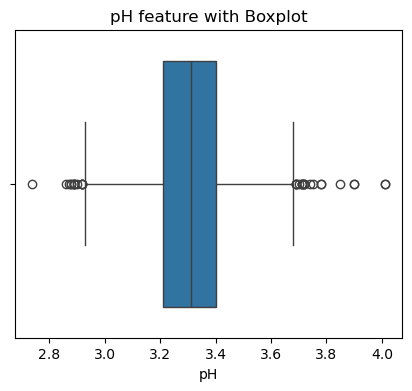

sulphates özelliği için IQR ile aykırı değerlerin indeksleri: (array([  13,   17,   19,   43,   79,   81,   83,   86,   88,   91,   92,
        106,  151,  161,  169,  181,  201,  226,  240,  258,  281,  338,
        339,  340,  369,  372,  376,  377,  415,  451,  477,  482,  483,
        503,  504,  506,  515,  586,  614,  639,  689,  692,  723,  754,
        795,  852, 1051, 1158, 1165, 1260, 1288, 1289, 1319, 1367, 1370,
       1371, 1372, 1403, 1408], dtype=int64),)


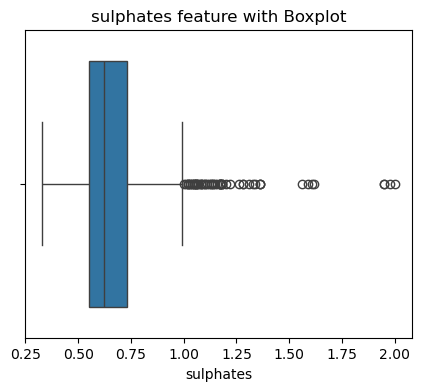

alcohol özelliği için IQR ile aykırı değerlerin indeksleri: (array([ 142,  144,  467,  588,  652,  821, 1114, 1132, 1228, 1269, 1270,
       1475, 1477], dtype=int64),)


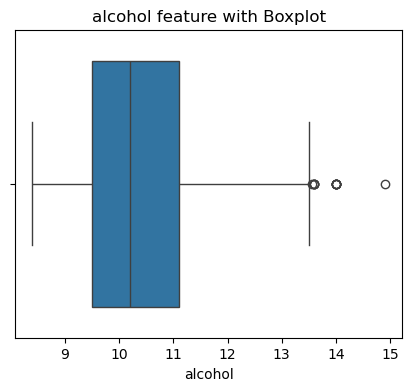

quality özelliği için IQR ile aykırı değerlerin indeksleri: (array([ 267,  278,  390,  440,  455,  459,  481,  495,  498,  517,  588,
        690,  828,  832,  899, 1061, 1090, 1120, 1202, 1269, 1299, 1374,
       1403, 1449, 1469, 1478, 1505, 1549], dtype=int64),)


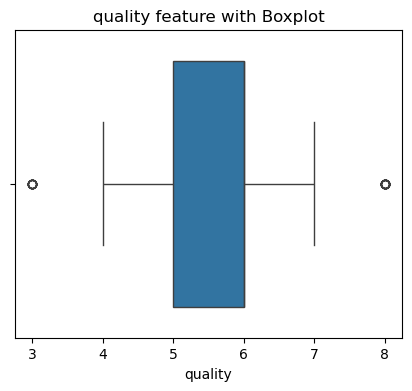

In [63]:
### Outlier Detection

# IQR function
def find_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.where((data < lower_bound) | (data > upper_bound))

for column in data.columns:
    outliers_iqr = find_outliers_iqr(data[column])

    print(f"{column} özelliği için IQR ile aykırı değerlerin indeksleri: {outliers_iqr}")
    plt.figure(figsize=(5, 4))
    sns.boxplot(x=data[column])
    plt.title(f"{column} feature with Boxplot")
    plt.show()

In [65]:
### Using ML to Predict the Quality of Wines

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [69]:
X = data.drop("quality", axis=1)
y = data["quality"]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [77]:
y_pred = model.predict(X_test)

In [81]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred, zero_division=0))
print('\nAccuracy Score:')
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[ 0  0  1  0  0  0]
 [ 0  0  7  3  0  0]
 [ 0  0 96 33  1  0]
 [ 0  0 31 92  8  1]
 [ 0  0  0 18 23  1]
 [ 0  0  0  1  4  0]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.71      0.74      0.72       130
           6       0.63      0.70      0.66       132
           7       0.64      0.55      0.59        42
           8       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.63      0.66      0.64       320


Accuracy Score:
0.659375
